In [114]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import bisect
from collections import Counter

In [115]:
#parameters

n = 20 #number of trials
p = 0.6 #probability of success

In [116]:
#Single time calculations of all x values in CDF

cdf_values = []
i = 0

while(sp.geom.cdf(i+1,p) < 0.9999): #fill until the cdf sums to 0.9999
    cdf_values.append(sp.geom.cdf(i+1,p)) #add cdf value for i
    i+=1 #increment i

In [120]:
#using one U(0,1) number, sample from a geometric(p)

unif_num = np.random.uniform(0,1) #single uniform U(0,1) realization

fails = bisect.bisect_left(cdf_values, unif_num) #use binary search to find the number of fails before a success

print(f"{fails} fail(s) before a successes")

2 fail(s) before a successes


In [118]:
#repeat this sampling process many times to approximate the PMF

repititions = 10000 #amount of geometrics to realize to approximate PMF

arr_unif_num = np.random.uniform(0,1,repititions) #uniform U(0,1) realization stored in an array
arr_successes = np.zeros(repititions)

for i in range(0, repititions):
    arr_successes[i] = bisect.bisect_left(cdf_values, arr_unif_num[i]) #fill array wuth geometric realizations

result_dict = Counter(arr_successes) #use a dictionary to match key value pairs

for j in result_dict:
    result_dict[j] = result_dict[j] / repititions #reformat as percentage

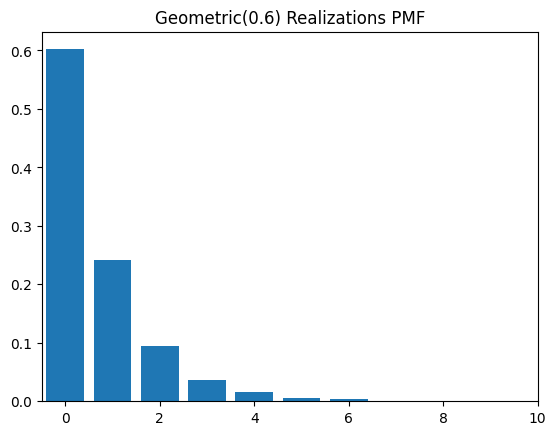

In [119]:
#chart the PMF approximation

x_axis_titles = list(result_dict.keys()) #number of geometric realizations
heights = list(result_dict.values()) #percentage of geometric realizations

plt.title(f"Geometric({p}) Realizations PMF")
plt.bar(x_axis_titles, heights)
plt.xlim(-0.5, len(cdf_values)) #stops the x axis at the max value

plt.show()